# Sleep EEG ICA preprocessing

## Introductory notes:
This notebook presents ICA artifact repair functionality:
* Fitting ICA
* Exploring components
* Excluding components from the raw data

Recommended readings:
1. [MNE: Repairing artifacts with ICA](https://mne.tools/stable/auto_tutorials/preprocessing/40_artifact_correction_ica.html)
2. [Learning eeg: artifacts](https://www.learningeeg.com/artifacts)

## Import data

### Import module
Add pipeline module to path and import its elements (just run this cell).

In [3]:
%matplotlib widget
from sleepeeg.pipeline import ICAPipe

### Initialize ICAPipe object

In [4]:
ica_pipe = ICAPipe(
    # can be any type of eeg file that MNE's read_raw() function supports.
    path_to_eeg=r"C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\cleaned_raw.fif",
    output_dir=r"C:\Users\Gennadiy\Documents\data\HZ4\processing",  # A directory you want the results to be saved in
    method='fastica',  # ICA method, can be either 'fastica', 'infomax' or 'picard'
    fit_params=None,  # Additional parameters passed to the ICA estimator as specified by 'method'.
    n_components=30,  # Number of principal components that are passed to the ICA algorithm during fitting.
    # path_to_ica=r'',  # If you want to load already fitted ICA - use this argument.
    )

Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\cleaned_raw.fif...
    Reading extended channel information
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 0 ... 2032249 =      0.000 ...  8128.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\cleaned_raw-1.fif...
    Reading extended channel information
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 2032250 ... 2229772 =   8129.000 ...  8919.088 secs
Ready.
Reading 0 ... 2229772  =      0.000 ...  8919.088 secs...


## Fit
Run the ICA decomposition on 1 Hz high-pass filtered data

In [5]:
ica_pipe.fit(
    filter_args=dict(
        l_freq=1.0,
        n_jobs='cuda'
    ),
    ica_fit_args=dict()
)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 sec)

Now using CUDA device 0
Enabling CUDA with 10.97 GB available memory
Using CUDA for FFT FIR filtering
Fitting ICA to data using 257 channels (please be patient, this may take a while)
Omitting 192715 of 2229773 (8.64%) samples, retaining 2037058 (91.36%) samples.
Selecting by number: 15 components
Fitting ICA took 79.7s.


## Explore

Plot independent components from raw data, you can select here components you want to exclude.

In [6]:
ica_pipe.plot_sources()

Creating RawArray with float64 data, n_channels=16, n_times=2229773
    Range : 0 ... 2229772 =      0.000 ...  8919.088 secs
Ready.
Using qt as 2D backend.


Plot components on interpolated sensor topography.

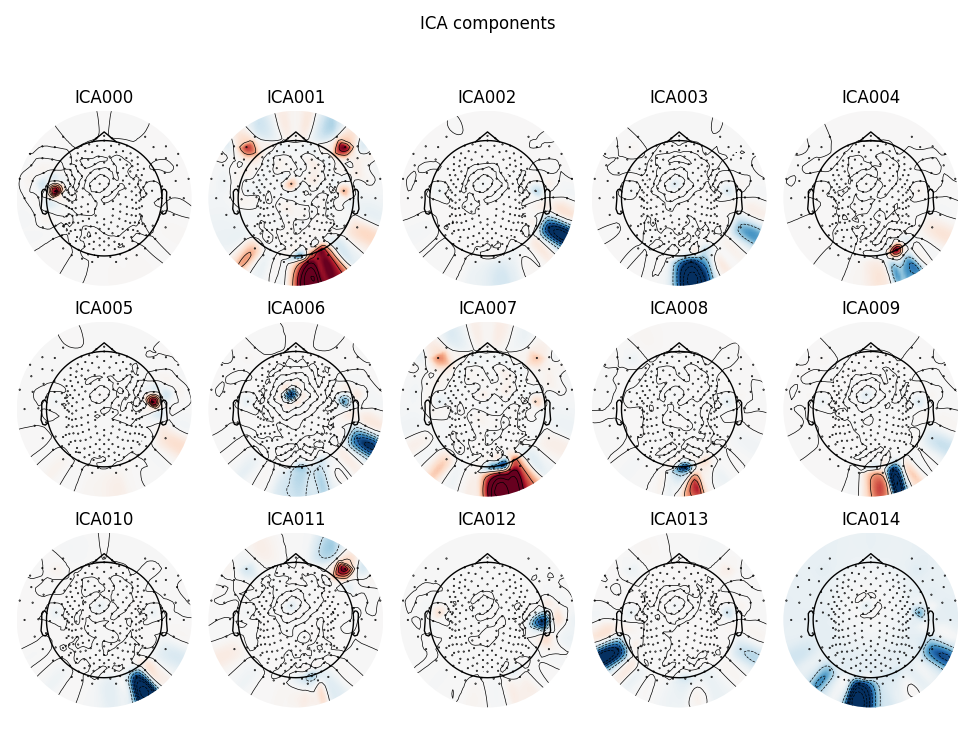

In [9]:
ica_pipe.plot_components()

Display component properties.

Properties include the topography, epochs image, ERP/ERF, power spectrum and epoch variance.

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
3966 matching events found
No baseline correction applied
0 projection items activated


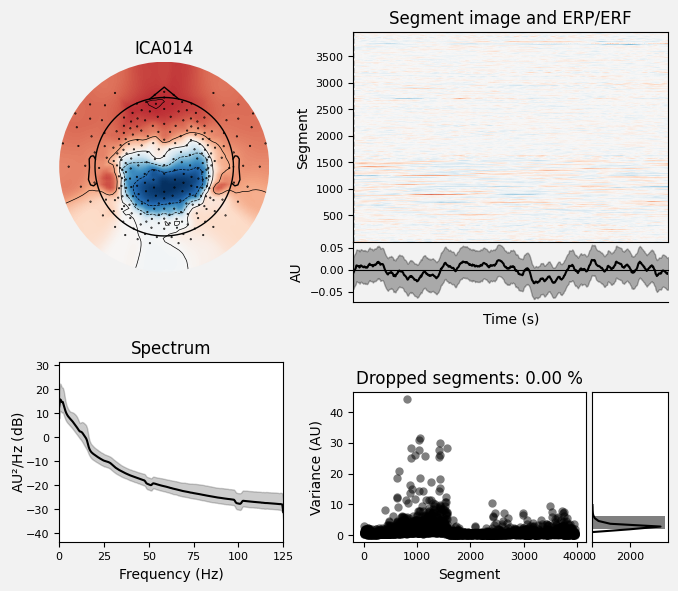

In [7]:
ica_pipe.plot_properties(picks=[14], fmin=0, fmax=40)

Overlay of raw and cleaned signals given the unmixing matrix.

This method helps visualizing signal quality and artifact rejection.

`start`, `stop` - two sample numbers describing interval of signal to plot.

`exclude` - which components to exclude in this plot.

`picks` - channels to plot.

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 257 PCA components


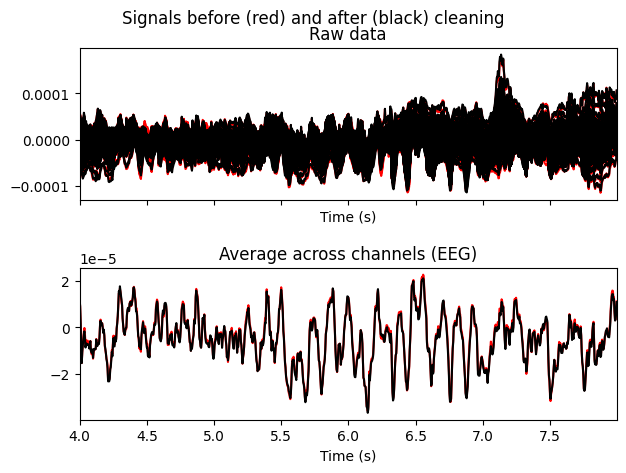

In [12]:
ica_pipe.plot_overlay(start=1000, stop=2000, exclude=[7], picks='eeg')

## Exclude
Apply to the raw signal ICA component exclusion.

In [13]:
ica_pipe.apply(exclude=[7])

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 257 PCA components


## Save raw and ica

In [14]:
ica_pipe.save_raw('after_ica_raw.fif')

Writing C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\after_ica_raw.fif
    Writing channel names to FIF truncated to 15 characters with remapping
Overwriting existing file.
Writing C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\after_ica_raw-1.fif
    Writing channel names to FIF truncated to 15 characters with remapping
Closing C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\after_ica_raw-1.fif
Closing C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\after_ica_raw.fif
[done]


In [ ]:
ica_pipe.save_ica(fname='ica.fif', overwrite=False)